In [65]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


---
# Dataset Preparation
---

In [51]:
data = fetch_ucirepo(id=80)

In [52]:
print(f"Name : {data.metadata.name}")
print(f"Instances : {data.metadata.num_instances}")
print(f"Features : {data.metadata.num_features}")

Name : Optical Recognition of Handwritten Digits
Instances : 5620
Features : 64


In [74]:
# print(data.data.features)
X = pd.DataFrame(data.data.features)
X


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [75]:
Y = pd.DataFrame(data.data.targets)
Y

,class
0,0
1,0
2,7
3,4
4,6
...,...
5615,9
5616,0
5617,8
5618,9


In [55]:
datastore = X.copy()
datastore['target'] = Y
datastore

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64,target
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
5616,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
5618,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


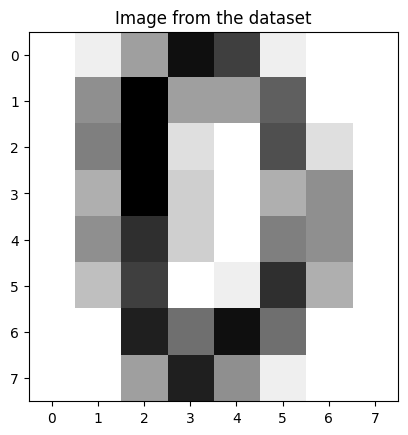

In [56]:
row = X.iloc[0].values.reshape(8,8)

plt.imshow(row, cmap='gray_r')
plt.title("Image from the dataset")
plt.show()

In [57]:
datastore.to_csv('Datasets/OCR_Digits.csv', index=False)

---
 # *PREPROCESSING DATA* 
---

In [62]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X) ,columns=X.columns)
X_scaled


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0.0,0.793133,0.129863,0.748317,0.094508,-0.815851,-0.410972,-0.132062,-0.035424,1.622966,...,-0.761830,-0.197899,-0.018868,-0.303102,0.047703,0.462445,-0.919036,-0.983796,-0.517244,-0.179136
1,0.0,-0.343381,0.985972,0.983303,-1.250136,-0.993451,-0.410972,-0.132062,-0.035424,1.622966,...,-0.150393,-0.197899,-0.018868,-0.303102,0.844405,0.922516,0.688929,-0.639861,-0.517244,-0.179136
2,0.0,-0.343381,0.557918,0.748317,0.990937,1.315342,-0.410972,-0.132062,-0.035424,-0.313430,...,-0.761830,-0.197899,-0.018868,-0.303102,0.645229,0.462445,-2.326006,-1.155764,-0.517244,-0.179136
3,0.0,-0.343381,-1.154300,-2.071514,-0.129599,1.848140,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-1.147350,-2.528016,0.688929,-0.811828,-0.517244,-0.179136
4,0.0,-0.343381,-0.084164,0.513331,-1.698350,-0.993451,-0.410972,-0.132062,-0.035424,-0.636162,...,1.683918,-0.197899,-0.018868,-0.303102,-0.350648,0.002374,0.487933,0.048010,-0.517244,-0.179136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0.0,-0.343381,-0.298191,-0.426612,0.318615,0.072146,-0.410972,-0.132062,-0.035424,-0.313430,...,0.053419,-0.197899,-0.018868,-0.303102,-0.748999,0.462445,0.688929,0.391946,-0.517244,-0.179136
5616,0.0,-0.343381,0.129863,0.983303,0.318615,0.960143,-0.113028,-0.132062,-0.035424,-0.636162,...,-0.558018,-0.197899,-0.018868,-0.303102,0.047703,0.922516,0.487933,-0.123957,-0.517244,-0.179136
5617,0.0,-0.343381,-0.940273,-0.191626,0.766830,-0.815851,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-0.748999,-0.687732,0.286937,-0.123957,-0.517244,-0.179136
5618,0.0,-0.343381,-0.726245,-0.426612,-1.026028,-0.993451,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.354206,-0.197899,-0.018868,-0.303102,-0.151473,0.002374,0.889924,0.907849,-0.517244,-0.179136


---
# CLUSTERING
---

In [92]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=42)

In [93]:
clusters = pd.DataFrame(kmeans.labels_)
clusters 

,0
0,5
1,5
2,3
3,9
4,4
...,...
5615,6
5616,5
5617,2
5618,6


In [94]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PC1', 'PC2'])
X_pca['target'] = clusters
X_pca

,PC1,PC2,target
0,-0.296633,-1.446450,5
1,-0.156717,-3.065688,5
2,-0.753929,3.261949,3
3,-4.226579,1.900320,9
4,0.582983,-3.490539,4
...,...,...,...
5615,-0.260749,0.532480,6
5616,-2.076395,-1.863463,5
5617,-0.793740,-0.622341,2
5618,-0.938669,-0.376866,6


In [96]:
cluster_centers = kmeans.cluster_centers_
cluster_centers = pca.transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=['PC1', 'PC2'])
cluster_centers


d:\Python 313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC1,PC2
0,-4.616320,-1.512905
1,4.219431,-0.732074
2,0.454059,0.523591
3,-1.752028,4.282728
4,-0.308610,-4.169441
5,-1.114291,-2.155902
6,1.812525,0.413621
7,0.926011,1.403927
8,-6.267710,-2.734352
9,-2.910061,1.069210


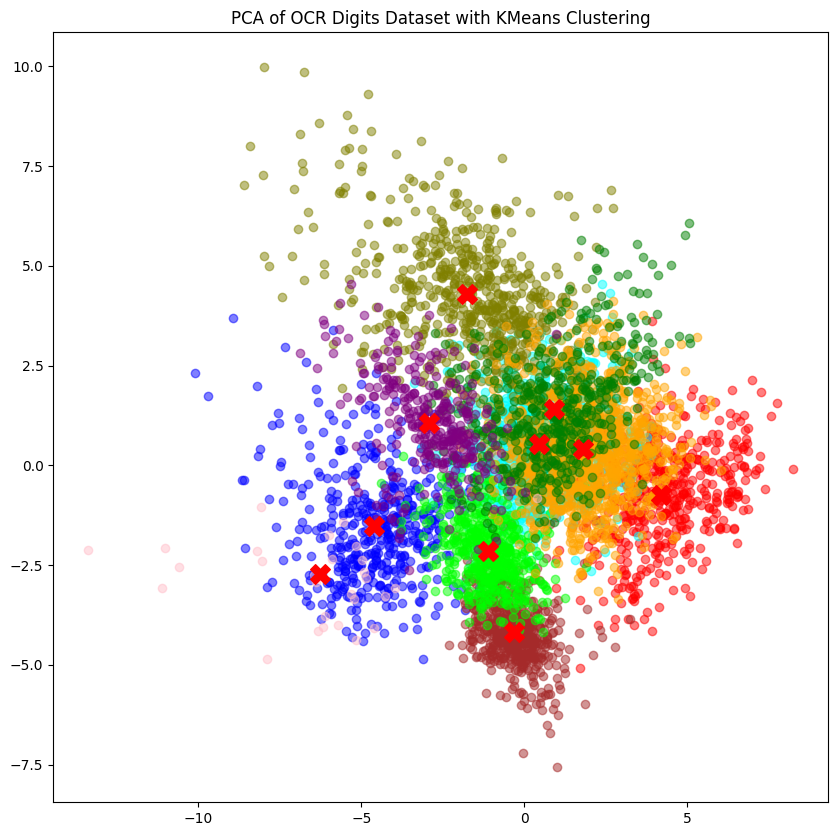

In [99]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[X_pca['target'] == 0]['PC1'], X_pca[X_pca['target'] == 0]['PC2'], c='blue', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 1]['PC1'], X_pca[X_pca['target'] == 1]['PC2'], c='red', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 2]['PC1'], X_pca[X_pca['target'] == 2]['PC2'], c='cyan', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 3]['PC1'], X_pca[X_pca['target'] == 3]['PC2'], c='olive', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 4]['PC1'], X_pca[X_pca['target'] == 4]['PC2'], c='brown', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 5]['PC1'], X_pca[X_pca['target'] == 5]['PC2'], c='lime', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 6]['PC1'], X_pca[X_pca['target'] == 6]['PC2'], c='orange', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 7]['PC1'], X_pca[X_pca['target'] == 7]['PC2'], c='green', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 8]['PC1'], X_pca[X_pca['target'] == 8]['PC2'], c='pink', label='Cluster 0' , alpha=0.5)
plt.scatter(X_pca[X_pca['target'] == 9]['PC1'], X_pca[X_pca['target'] == 9]['PC2'], c='purple', label='Cluster 0' , alpha=0.5)
# plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_pca['target'], cmap='viridis', alpha=0.5, label='Clusters')

plt.scatter(cluster_centers['PC1'], cluster_centers['PC2'], c='red', marker='X', s=200, label='Centroids')  
plt.title('PCA of OCR Digits Dataset with KMeans Clustering')
plt.show()
